In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Reading the dataset
#df = pd.read_csv('netflix.csv')
df = pd.read_csv('https://d2beiqkhq929f0.cloudfront.net/public_assets/assets/000/000/940/original/netflix.csv')

## Analyzing basic metrics, shape of data and datatypes of attributes

In [3]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [5]:
# Shape of data
df.shape

(8807, 12)

In [6]:
#Data types of all atrributes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [7]:
# Grain of data - Each row is a movie/ TV show
df['show_id'].nunique()

8807

### Observarions

1. The dataset contains 8807 rows and 12 columns.
2. The number of unique show ids is the same as number of entries in the dataset. The grain of data is at a show/ movie level. 
3. There are 11 categorical columns and 1 numeric column (release_year) in the dataset.

## Value counts and unique attributes

In [8]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [9]:
df['type'].value_counts()

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [10]:
print("Number of countries: ", df['country'].nunique())
df['country'].value_counts()

Number of countries:  748


United States                                      2818
India                                               972
United Kingdom                                      419
Japan                                               245
South Korea                                         199
                                                   ... 
Ireland, United Kingdom, Italy, United States         1
United Kingdom, Lithuania                             1
United States, Australia, Samoa, United Kingdom       1
Canada, Germany, South Africa                         1
United States, New Zealand, Japan                     1
Name: country, Length: 748, dtype: int64

In [11]:
df['rating'].value_counts()

TV-MA       3207
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
84 min         1
66 min         1
74 min         1
Name: rating, dtype: int64

### Observarions
1. The are only two types of content - Movies and TV Shows
2. There are 748 unique values in the country column. However, this is due to some content being developed by multiple countries in collaboration.
3. There seems to be some erroneous entries in the rating column with the values: '66 min' , '84 min' , '74 min'

## Missing values detection and treatment

In [12]:
# Count of missing values in each column
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [13]:
# Filling NaN values in director, cast, country, rating and duration columns
df["director"].fillna("Not Available", inplace = True)
df["country"].fillna("Not Available", inplace = True)
df["cast"].fillna("Not Available", inplace = True)
df["rating"].fillna("Not Available", inplace = True)
df["duration"].fillna("Not Available", inplace = True)

In [14]:
# Count of missing values in each column
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
dtype: int64

In [15]:
## Changing the data type of date added column to datetime
df['date_added'] = pd.to_datetime(df['date_added'])

In [16]:
#Including added year, month columns
df['year_added'] = df['date_added'].apply(lambda x: x.year)
df['month_added'] = df['date_added'].dt.month_name()

In [17]:
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         0
listed_in        0
description      0
year_added      10
month_added     10
dtype: int64

## Visual Analysis

In [18]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


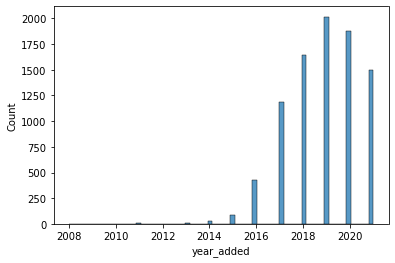

In [19]:
sns.histplot(data = df, x = 'year_added')
plt.show()

The new titles added in a year was increasing till 2019. However, this has been in a decreasing trend since.

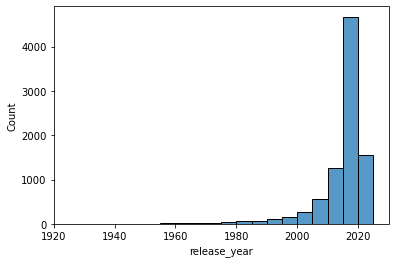

In [20]:
sns.histplot(data = df, x = 'release_year', binwidth=5)
plt.show()

Most of the content on the platform are titles released after 2010.

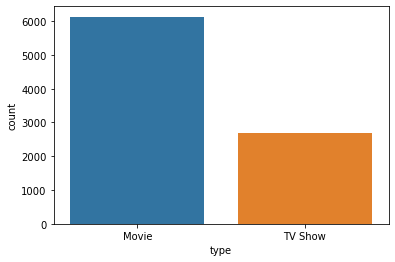

In [21]:
sns.countplot(data=df, x='type')
plt.show()

The totla library consists of around 6000 movies and 2500 TV shows.

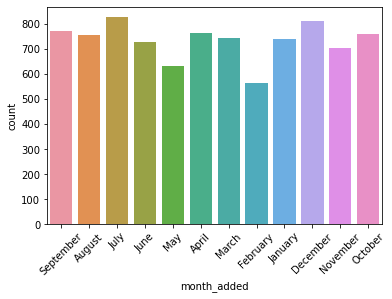

In [22]:
sns.countplot(data=df, x='month_added')
plt.xticks(rotation=45)
plt.show()

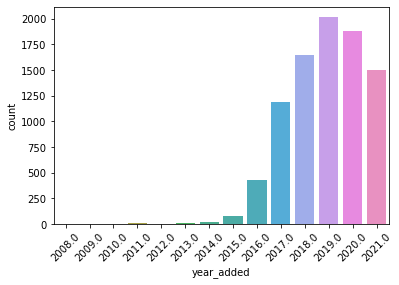

In [23]:
sns.countplot(data=df, x='year_added')
plt.xticks(rotation=45)
plt.show()

### Denesting director, cast and listed_in columns

In [24]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


In [25]:
# Creating show to directors mapping table for denesting the director column
constraint=df['director'].apply(lambda x: str(x).split(', ')).tolist() 
df_dir=pd.DataFrame(constraint,index=df['show_id'])
df_dir=df_dir.stack().reset_index()
#df_dir=pd.DataFrame(df_dir)
df_dir.head()

,show_id,level_1,0
0,s1,0,Kirsten Johnson
1,s2,0,Not Available
2,s3,0,Julien Leclercq
3,s4,0,Not Available
4,s5,0,Not Available


In [26]:
df_dir.rename(columns={0:"director_new"}, inplace=True)
print(df_dir.shape)
df_dir.head()

(9612, 3)


,show_id,level_1,director_new
0,s1,0,Kirsten Johnson
1,s2,0,Not Available
2,s3,0,Julien Leclercq
3,s4,0,Not Available
4,s5,0,Not Available


In [27]:
# Joining de nested director table and original table
df_join = pd.merge(df_dir, df, left_on='show_id', right_on='show_id', how='left')
print(df_join.shape)
df_join.head()

(9612, 16)


,show_id,level_1,director_new,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,0,Kirsten Johnson,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,0,Not Available,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,0,Julien Leclercq,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,0,Not Available,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,0,Not Available,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


In [28]:
df_join['director_new'].value_counts()

Not Available               2634
Rajiv Chilaka                 22
Jan Suter                     21
Raúl Campos                   19
Marcus Raboy                  16
                            ... 
Malik Vitthal                  1
John Irvin                     1
Carlos Pérez Osorio            1
Nils Tavernier                 1
Alejandra Márquez Abella       1
Name: director_new, Length: 4994, dtype: int64

### Observations
1. Rajiv Chilaka, Jan Suter, Raúl Campos are the top 3 directors with most titles on Netflix. 
2. The director details are not available for 2634 titles.

In [29]:
df.head(2)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September


In [30]:
# Creating show to country mapping table for denesting the country column
constraint=df['country'].apply(lambda x: str(x).split(', ')).tolist() 
df_country=pd.DataFrame(constraint,index=df['show_id'])
df_country=df_country.stack().reset_index()
#df_dir=pd.DataFrame(df_dir)
df_country.head()

,show_id,level_1,0
0,s1,0,United States
1,s2,0,South Africa
2,s3,0,Not Available
3,s4,0,Not Available
4,s5,0,India


In [31]:
df_country.rename(columns={0:"country_new"}, inplace=True)
print(df_country.shape)
df_country.head()

(10845, 3)


,show_id,level_1,country_new
0,s1,0,United States
1,s2,0,South Africa
2,s3,0,Not Available
3,s4,0,Not Available
4,s5,0,India


In [32]:
# Joining de nested country table and original table
df_join = pd.merge(df_country, df, left_on='show_id', right_on='show_id', how='left')
print(df_join.shape)
df_join.head()

(10845, 16)


,show_id,level_1,country_new,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,year_added,month_added
0,s1,0,United States,Movie,Dick Johnson Is Dead,Kirsten Johnson,Not Available,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",2021.0,September
1,s2,0,South Africa,TV Show,Blood & Water,Not Available,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2021.0,September
2,s3,0,Not Available,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Not Available,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,2021.0,September
3,s4,0,Not Available,TV Show,Jailbirds New Orleans,Not Available,Not Available,Not Available,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",2021.0,September
4,s5,0,India,TV Show,Kota Factory,Not Available,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2021.0,September


In [33]:
df_join['country_new'].value_counts()[:25]

United States     3689
India             1046
Not Available      831
United Kingdom     804
Canada             445
France             393
Japan              318
Spain              232
South Korea        231
Germany            226
Mexico             169
China              162
Australia          160
Egypt              117
Turkey             113
Hong Kong          105
Nigeria            103
Italy              100
Brazil              97
Argentina           91
Belgium             90
Indonesia           90
Taiwan              89
Philippines         83
Thailand            70
Name: country_new, dtype: int64

### Observations
1. The top 5 countries producing the most content are United States, India, United Kingdom, Canada, France.
2. The country details are not available for 831 titles.

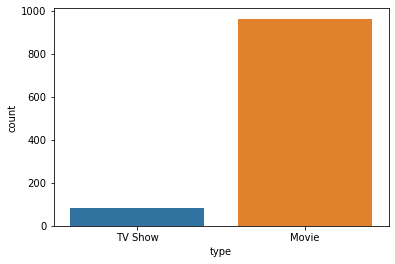

In [34]:
sns.countplot(data=df_join[df_join['country_new']== 'India'], x = 'type')
plt.show()

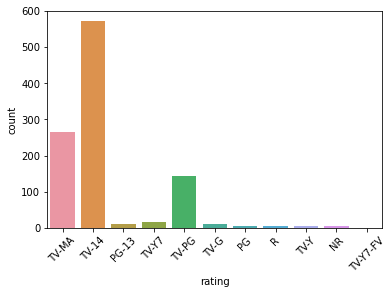

In [35]:
sns.countplot(data=df_join[df_join['country_new']== 'India'], x = 'rating')
plt.xticks(rotation=45)
plt.show()

### Observations
1. The total Netflix library consists of 6000+ movies and 2500+ TV shows (ratio of ~ 1:2). However, for Indian content, there are almost 10x more movies when compared to TV shows.

## Insights
1. The majority of content on Netflix was are titles which released after 2010. This could be due because the primary focus of Netflix is creating and adding new content.
2. The number of title added in a year peaked in 2019. The new titles added yearly has been decreasing since then. This could be due to new rival streaming platforms and focus on producing original content rather acquiring content.
3. Details of director is not available for 2634 titles and country details are not available for 831 title.
4. The total Netflix library consists of 6000+ movies and 2500+ TV shows (ratio of ~ 1:2). However, for Indian content, there are almost 10x more movies when compared to TV shows.

## Recommendations
1. Most of the content on the platform are titles which were originally released after 2010. Adding more shows/ movies from 1970s, 1980s, 1990s and 2000s could increase viewership from people in above 35 years age group.
2. The number of new titles added has been decreasing in the last three years. Netflix should focus on reversing this trend by acquiring/ producing more titles.
3. Netflix should work on adding as much details about the titles as possible ( details of director, country etc.). Since users are likely to search for content from a particular director/ country, the unavailability of these details would result in incomplete search results and suboptimal user experience.
4. Since India produces most content in the world and is also a market with exponential growth potential, Netflix should focus on acquiring/ producing original Indian TV shows as these shows could act as a hook attracting and retaining customers from this market.